In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
dataset = pd.read_csv("mouse_viral_study.csv")
dataset

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [3]:
X = dataset[['Med_1_mL', 'Med_2_mL']].values
y = dataset[['Virus Present']].values

In [4]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


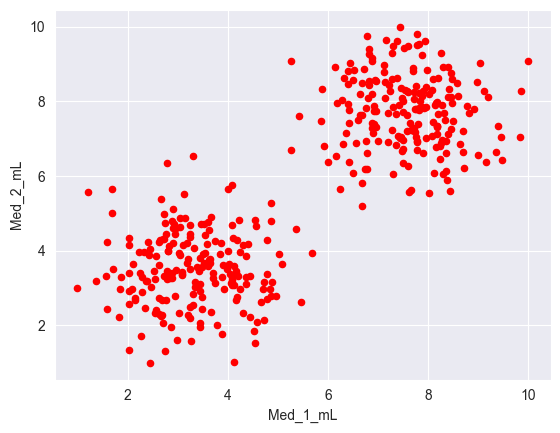

In [5]:
dataset.plot.scatter(x='Med_1_mL',y="Med_2_mL", c="red",colormap='winter')
plt.show()

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)


# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [7]:
W,b=initialisation(x_train)
modele(X, W, b)
x_train.shape
y_train.shape

(320, 1)

In [8]:
def log_loss(y, A):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


def gradients(X, A, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)


def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [9]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
    # Initialisation
    W, b = initialisation(X)
    loss_history = []
    # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W, b

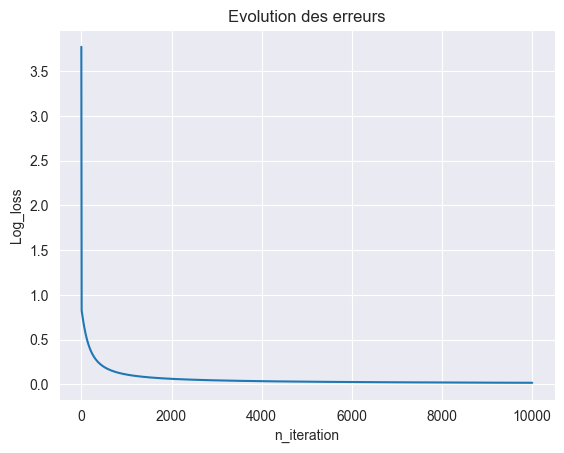

In [10]:
W,b=regression_logistique(x_train, y_train)

In [11]:
from sklearn.metrics import accuracy_score
y_pred = predict(x_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[9.95493458e-01]
 [9.99804827e-01]
 [7.10226756e-03]
 [9.97985242e-01]
 [1.22207131e-04]
 [1.38702712e-03]
 [9.75404752e-01]
 [9.97464504e-01]
 [1.17581647e-02]
 [5.68856195e-02]
 [9.69929373e-01]
 [4.89934536e-03]
 [8.21370814e-01]
 [9.95821823e-01]
 [9.88416834e-01]
 [9.96028256e-01]
 [9.89045569e-01]
 [1.28312644e-02]
 [1.72349265e-02]
 [1.73620806e-02]
 [3.32037174e-03]
 [9.52188718e-01]
 [9.81458106e-01]
 [7.51614329e-04]
 [9.82522512e-01]
 [4.06885530e-04]
 [9.97712328e-01]
 [8.37423080e-04]
 [9.91623389e-01]
 [9.93520734e-01]
 [6.09392614e-03]
 [2.77703728e-04]
 [9.99901779e-01]
 [9.98658063e-01]
 [9.79732364e-01]
 [9.94487925e-01]
 [9.91547223e-01]
 [6.96424615e-04]
 [9.43476714e-03]
 [5.97597525e-04]
 [9.99627302e-01]
 [6.88342120e-04]
 [2.65848921e-03]
 [9.87895125e-01]
 [9.98815139e-01]
 [9.69661421e-03]
 [9.43465592e-03]
 [9.98401235e-01]
 [2.09865738e-02]
 [9.78491795e-01]
 [3.73236979e-03]
 [9.93751394e-01]
 [9.95849147e-01]
 [1.92704146e-03]
 [9.94816478e-01]
 [2.379455

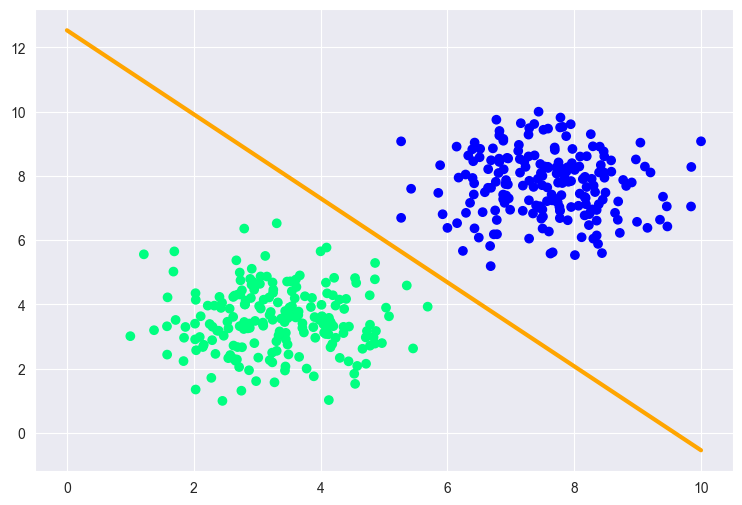

In [12]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 10, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

In [13]:
df = pd.read_csv("datatraining.txt")
X = df[['Light','CO2']].values
y = df[['Occupancy']].values
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X= sc.transform(X)


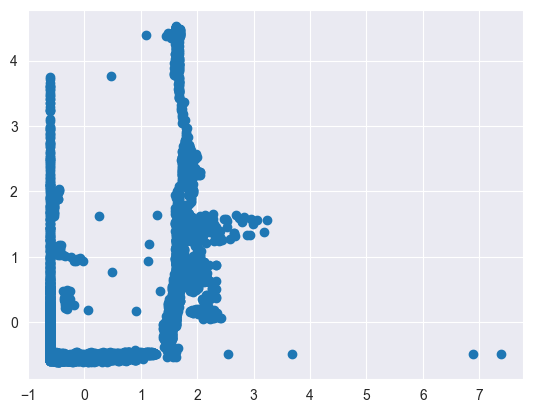

In [14]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [15]:
W_1,b_1=initialisation(X_train)
modele(X_train, W_1, b_1)

array([[0.13072072],
       [0.13170512],
       [0.11669245],
       ...,
       [0.13017655],
       [0.61507341],
       [0.62788704]])

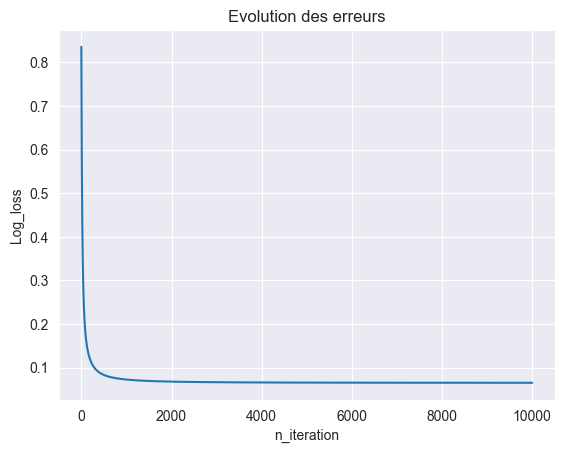

In [16]:
W_1,b_1=regression_logistique(X_train, y_train)

In [17]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, W_1, b_1)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[9.26598067e-01]
 [8.05882036e-01]
 [6.42413159e-04]
 ...
 [1.77458563e-03]
 [6.11727759e-04]
 [7.14120558e-04]]
Accuracy= 0.9883364027010436


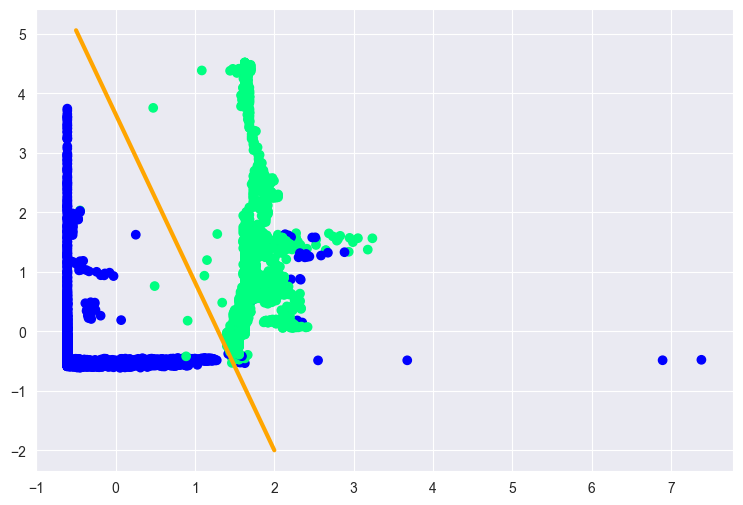

In [18]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(-0.5, 2, 200)
x2 = ( - W_1[0] * x1 - b_1) / W_1[1]
ax.plot(x1, x2, c='orange', lw=3)

array([[0.16827474],
       [0.29294905],
       [0.20224668],
       ...,
       [0.26909273],
       [0.37924332],
       [0.2242489 ]])

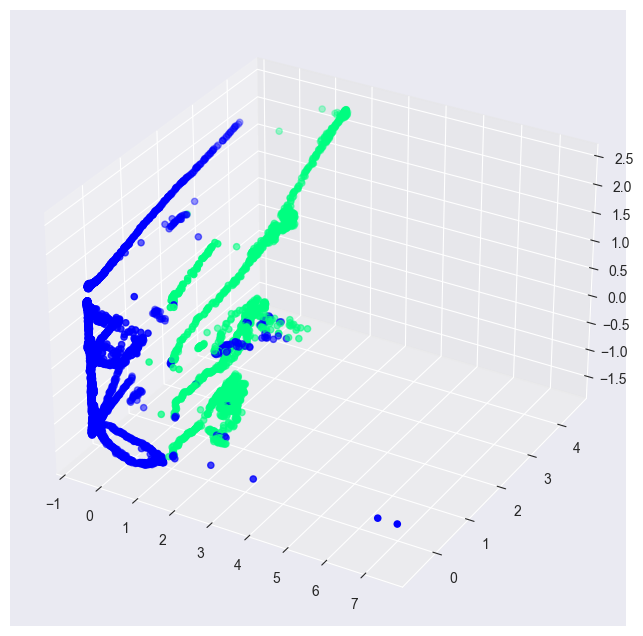

In [19]:
df = pd.read_csv("datatraining.txt")
X = df[['Light', 'CO2','Humidity']].values
y = df[['Occupancy']].values
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X = sc.transform(X)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the dataset
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='winter')
W_1, b_1 = initialisation(X_train)
modele(X_train, W_1, b_1)



IndexError: index 2 is out of bounds for axis 0 with size 2

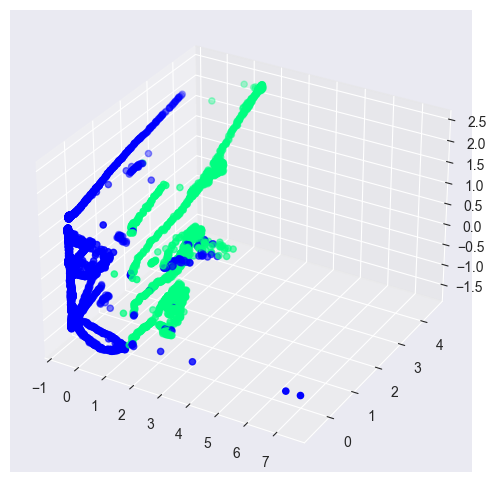

In [22]:


fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='winter')

# Decision boundary
x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 10)
x2 = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
x1, x2 = np.meshgrid(x1, x2)
x3 = (-W_1[0] * x1 - W_1[1] * x2 - b) / W_1[2]
ax.plot_surface(x1, x2, x3, alpha=0.5, color='orange')

ax.set_xlabel('Light')
ax.set_ylabel('CO2')
ax.set_zlabel('Humidity')
ax.set_title('Logistic Regression Decision Boundary in 3D')

plt.show()

[[9.13539178e-01]
 [9.03503337e-01]
 [5.08278455e-04]
 ...
 [1.31673378e-03]
 [9.40255153e-04]
 [1.19476778e-03]]
Accuracy= 0.9877225291589933


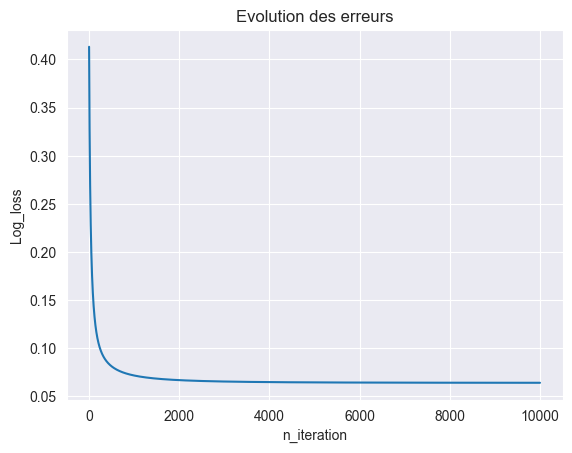

In [23]:
W_1, b_1 = regression_logistique(X_train, y_train)
from sklearn.metrics import accuracy_score

y_pred = predict(X_test, W_1, b_1)
print("Accuracy=", accuracy_score(y_test, y_pred))


In [28]:
%matplotlib notebook

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='winter')

# Decision boundary
x1 = np.linspace(-5, 5, 10)
x2 = np.linspace(-5, 5, 10)
x1, x2 = np.meshgrid(x1, x2)
x3 = (-W_1[0] * x1 - W_1[1] * x2 - b) / W_1[2]
ax.plot_surface(x1, x2, x3, alpha=0.5, color='orange')

ax.set_xlabel('Light')
ax.set_ylabel('CO2')
ax.set_zlabel('Humidity')
ax.set_title('Logistic Regression Decision Boundary in 3D')

plt.show()

<IPython.core.display.Javascript object>